# Assessed Task 2: COMP7220/8220

For this assignment, you will use the Pima Indians Diabetes Dataset that comes originally from the National Institute of Diabetes and Digestive and Kidney Disease. The data is available in a single csv file but since it is real world data it contains a number of null values. The assignment follows the workflow of a simple data science project and you will use a K-nearest neighbor classifier for the following 10 tasks. 

Name: Mohammad Abdul Ahad Chowdhury
Student ID: 46168249

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

random_state = 42

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## A. Pre-processing

**Task 1**: Replace all null values in the data frame (apart from values in the Pregnancies and Outcome columns) by NaN, then display the head of the data frame and print out the number of missing values for each feature.  [1 mark]

In [5]:
listOfCols = [i for i in list(df.columns) if i != 'Pregnancies' and i != 'Outcome']

for col in listOfCols:
    df[col] = df[col].replace(0, np.nan)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Task 2**: Import the SimpleImputer class from sklearn.impute, then use the mean as strategy to replace all NaNs, fit and transform the modfied data frame (using the fit_transform() function) and print again the number of missing values for each feature. [1 mark]

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
newdf = pd.DataFrame(imputer.fit_transform(df))
newdf.columns = df.columns
newdf.index = df.index

newdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [8]:
newdf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## B. Scaling

Distribution of values before scaling

<AxesSubplot:>

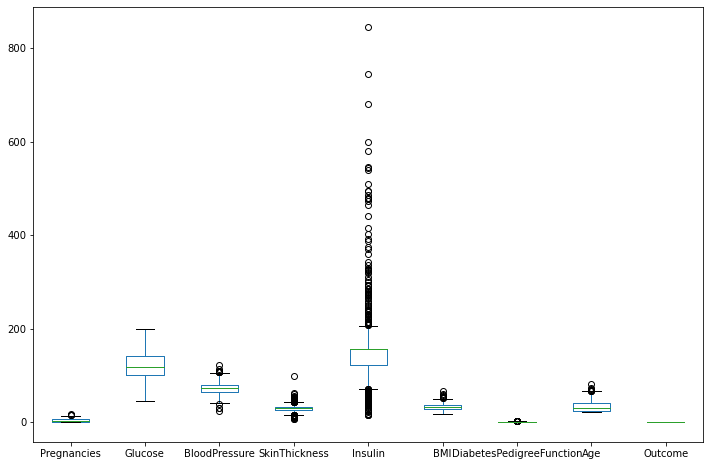

In [9]:
newdf.plot(kind='box', figsize=(12, 8))

**Train 3:** Import the MinMaxScaler scaler class from sklearn.preprocessing, fit and transform the data and plot the normalised data (using a box plot) in order to display the distribution of values after scaling. [1 mark]

<AxesSubplot:>

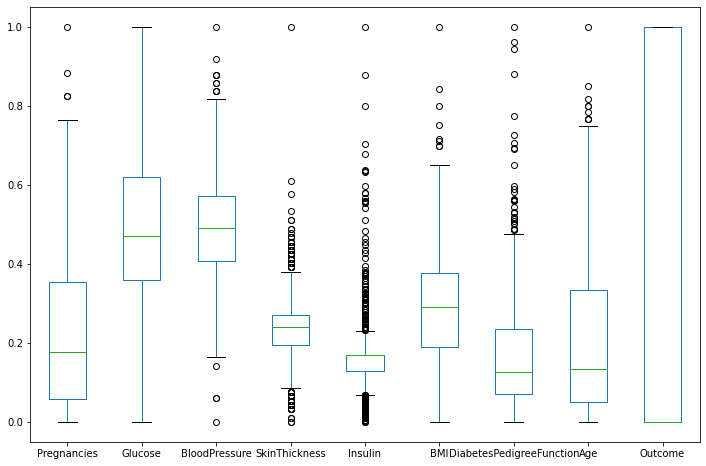

In [10]:
# Your code goes here.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(newdf))
df.columns = newdf.columns
df.index = newdf.index

df.plot(kind='box', figsize=(12, 8))

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


**Task 4**: Split the data frame into a training set (X_train, y_train) and a test set (X_test, y_test), use 0.33 as test size and the previously defined random_state parameter (42). [1 mark]

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

values = [('Original data', df),
          ('X', X),
          ('y', y),
          ('X_train', X_train),
          ('X_test', X_test),
          ('y_train', y_train),
          ('y_test', y_test)]

for (name, value) in values:
    print(name, value.shape)

Original data (768, 9)
X (768, 8)
y (768,)
X_train (514, 8)
X_test (254, 8)
y_train (514,)
y_test (254,)


# C. Train and Evaluate the Model

**Task 5**: Import the KNeighborsClassifier from sklearn.neighbors, set n_neighbors to 5, fit the model, make predications (using X_test) and report the accuracy of the classifier (using the accuracy_score() function from sklearn.metrics). [1 mark]

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred)

print('Accuracy: %1.2f' % acc)

Accuracy: 0.71


**Task 6:** Report precision, recall and f1-score for the classifier (using the classification_report() function from sklearn.metrics). [1 mark]

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       168
         1.0       0.58      0.55      0.56        86

    accuracy                           0.71       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.71      0.71      0.71       254



**Task 7:** Import the cross_value_score function from sklearn.model_selection, use 10-fold cross validation and report the accuracy of the classifier. [1 mark]

In [15]:
from sklearn.model_selection import cross_val_score
from statistics import mean

scores = (cross_val_score(knn, X_train, y_train, cv=10))
print('Accuracy: %1.2f' % mean(scores))

Accuracy: 0.75


**Task 8**: Import the cross_val_predict function from sklearn.model_selection and compute again precision, recall and F1-score for the classifier. The output wil look similar to the output of Task 6. [1 mark]

In [16]:
from sklearn.model_selection import cross_val_predict

print(classification_report(y_test, cross_val_predict(knn, X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       168
         1.0       0.64      0.62      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



**Task 9**: Generate a confusion matrix and print the number of true negatives, false positives, false negatives, and true positives for the classification.

In [17]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_test, pred)

print('True Negatives:', cmat[0, 0])
print('False Positives:', cmat[0, 1])
print('False Negatives:', cmat[1, 0])
print('True Positives:', cmat[1, 1])

True Negatives: 134
False Positives: 34
False Negatives: 39
True Positives: 47


**Task 10**: Evaluate alternative values for K and plot the error rate versus the K-values. 

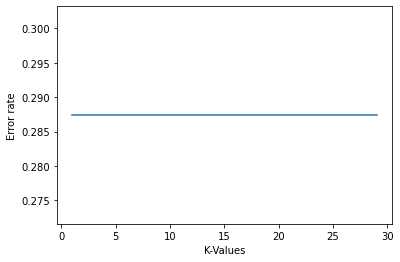

In [18]:
X = range(1, 30)
Y = []

for i in X:
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred)
    Y.append(1 - acc)

plt.xlabel('K-Values')
plt.ylabel('Error rate')
plt.plot(X, Y)